## 46-886

## Data Clustering using KMeans

Amr Farahat

CMU / Tepper

2023-03-08

---

## Setting up

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Main analysis package
from sklearn.metrics import silhouette_score
# requires: conda install -c conda-forge scikit-plot
import scikitplot as skplt

In [5]:
pd.options.display.max_columns = None

### Importing data

In [6]:
df = pd.read_csv("airline_loyalty_program.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Balance          3999 non-null   int64
 1   BonusMiles       3999 non-null   int64
 2   BonusTrans       3999 non-null   int64
 3   DaysSinceEnroll  3999 non-null   int64
 4   FlightMiles      3999 non-null   int64
 5   FlightTrans      3999 non-null   int64
dtypes: int64(6)
memory usage: 187.6 KB


In [8]:
df

,Balance,BonusMiles,BonusTrans,DaysSinceEnroll,FlightMiles,FlightTrans
0,48296,31329,9,3061,500,1
1,10021,0,0,7879,0,0
2,49280,22370,16,3312,0,0
3,213539,2750,15,4751,0,0
4,125465,14750,9,7206,0,0
...,...,...,...,...,...,...
3994,3016,0,0,1398,0,0
3995,28577,48564,14,3586,0,0
3996,276571,42044,23,7872,0,0
3997,28848,0,0,3069,0,0


### Standardizing data

In [9]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [10]:
scaler.mean_

array([7.36013276e+04, 1.71448462e+04, 1.16019005e+01, 4.11855939e+03,
       4.60055764e+02, 1.37359340e+00])

In [11]:
scaler.scale_

array([1.00763064e+05, 2.41479480e+04, 9.60260948e+00, 2.06487632e+03,
       1.40003409e+03, 3.79269812e+00])

In [12]:
standardized_df = df.copy()
standardized_array = scaler.transform(standardized_df)

In [13]:
standardized_array = pd.DataFrame(scaler.transform(standardized_df))
standardized_df[:] = standardized_array

In [14]:
standardized_df

,Balance,BonusMiles,BonusTrans,DaysSinceEnroll,FlightMiles,FlightTrans
0,-0.251137,0.587385,-0.270958,-0.512166,0.028531,-0.098503
1,-0.630988,-0.709992,-1.208203,1.821146,-0.328603,-0.362168
2,-0.241371,0.216381,0.458011,-0.390609,-0.328603,-0.362168
3,1.388779,-0.596111,0.353873,0.306285,-0.328603,-0.362168
4,0.514709,-0.099174,-0.270958,1.495218,-0.328603,-0.362168
...,...,...,...,...,...,...
3994,-0.700508,-0.709992,-1.208203,-1.317541,-0.328603,-0.362168
3995,-0.446834,1.301111,0.249734,-0.257913,-0.328603,-0.362168
3996,2.014326,1.031108,1.186979,1.817756,-0.328603,-0.362168
3997,-0.444144,-0.709992,-1.208203,-0.508292,-0.328603,-0.362168


In [15]:
standardized_df.mean()

Balance            2.487521e-17
BonusMiles        -4.175482e-17
BonusTrans        -7.640244e-17
DaysSinceEnroll    6.174384e-17
FlightMiles       -2.665202e-18
FlightTrans        1.510281e-17
dtype: float64

In [16]:
standardized_df.std()

Balance            1.000125
BonusMiles         1.000125
BonusTrans         1.000125
DaysSinceEnroll    1.000125
FlightMiles        1.000125
FlightTrans        1.000125
dtype: float64

### KMeans clustering (k=4)

In [17]:
k = 4

In [18]:
clustering_kmeans = KMeans(n_clusters=k, n_init=1, random_state=886)
#default values: n_clusters=8; n_init=10; 
clustering_kmeans.fit(standardized_df)

KMeans(n_clusters=4, n_init=1, random_state=886)

In [19]:
clustering_kmeans.inertia_

12237.062118387319

In [20]:
clustering_kmeans = KMeans(n_clusters=k, n_init=100, random_state=886)
#default values: n_clusters=8; n_init=10; 
clustering_kmeans.fit(standardized_df)

KMeans(n_clusters=4, n_init=100, random_state=886)

In [21]:
clustering_kmeans.inertia_

12235.24139601925

In [22]:
clustering_kmeans.cluster_centers_

array([[ 1.01819265,  0.64962649,  1.7477244 ,  0.26016563,  3.83000177,
         4.09431598],
       [-0.16277545, -0.34253427, -0.25077521,  0.82550651, -0.1757838 ,
        -0.18987411],
       [-0.35034317, -0.42799196, -0.41419444, -0.88780542, -0.1974103 ,
        -0.21415119],
       [ 0.84583116,  1.39330567,  1.00401224,  0.38826678,  0.03487614,
         0.04734655]])

In [23]:
clustering_kmeans.labels_

array([2, 1, 2, ..., 3, 2, 3], dtype=int32)

In [24]:
new_data = { 
    'Balance' : [1], 
    'BonusMiles' : [1],
    'BonusTrans' : [1],
    'DaysSinceEnroll' : [1],
    'FlightMiles' : [1],
    'FlightTrans' : [1],
}
new_data_df = pd.DataFrame(new_data)

In [25]:
clustering_kmeans.predict(new_data_df)

array([3], dtype=int32)

In [26]:
# soft clustering
clustering_kmeans.transform(new_data_df)

array([[4.33742327, 2.74728949, 3.51202185, 1.54651339]])

### Elbow plot

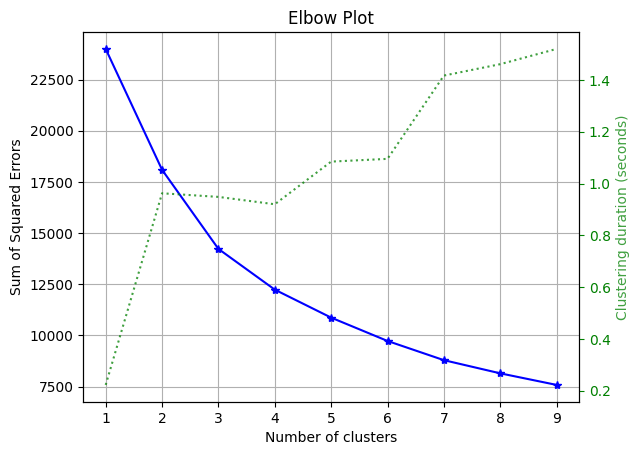

In [27]:
skplt.cluster.plot_elbow_curve(clustering_kmeans, standardized_df, cluster_ranges=range(1, 10))
plt.show()

### KMeans clustering (k=8)

In [28]:
k = 8

In [29]:
clustering_kmeans = KMeans(n_clusters=k, n_init=10, random_state=886)
#default values: n_clusters=8; n_init=10; 
clustering_kmeans.fit(standardized_df)

KMeans(n_init=10, random_state=886)

In [30]:
clustering_kmeans.inertia_

8157.250931369888

In [31]:
clustering_kmeans.cluster_centers_
df_centroids = pd.DataFrame(clustering_kmeans.cluster_centers_, columns=standardized_df.columns)
df_centroids

,Balance,BonusMiles,BonusTrans,DaysSinceEnroll,FlightMiles,FlightTrans
0,0.758186,2.403795,1.288314,0.378878,-0.028649,0.023188
1,0.275675,0.096392,0.766046,-0.014118,1.883549,1.898694
2,0.768712,0.861701,2.494494,0.152801,5.838059,6.073200
3,5.381242,1.805167,1.008209,1.128554,0.772953,1.052832
4,-0.415766,-0.609587,-0.865571,-1.014455,-0.238429,-0.247686
5,0.357048,0.382500,0.500497,1.039880,-0.173459,-0.194345
6,-0.156481,0.081184,0.547844,-0.630448,-0.241406,-0.258421
7,-0.339756,-0.568269,-0.701322,0.717701,-0.221086,-0.230759


In [32]:
np.unique(clustering_kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([264, 214,  54,  60, 964, 649, 858, 936]))

### Parallel plot

<Axes: >

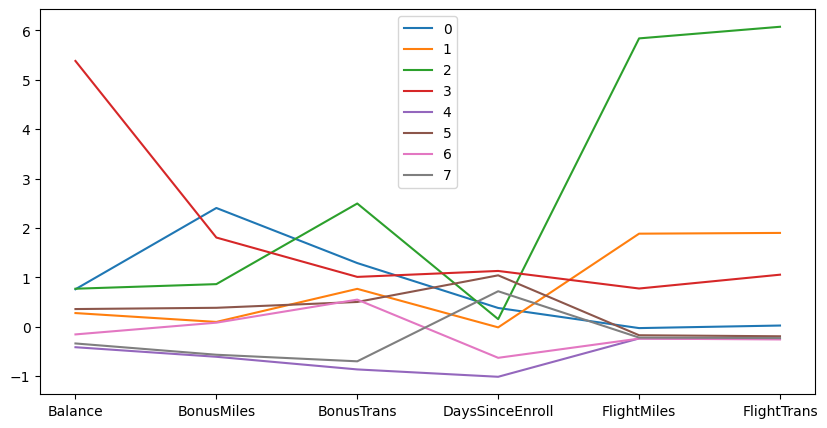

In [33]:
df_centroids.T.plot(figsize = (10,5))

### END